In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
# Veri setini yükleme
df = pd.read_csv('/content/drive/MyDrive/NLP/lemma.csv')



In [ ]:
df.head()

,Sınıf,lemmatized_text
0,magazin,para şöhret var peki boşa iş ün boşanma UNK UN...
1,magazin,sosyetik güzel eda taşpınar önce gün tarabya o...
2,siyaset,suudi arabistan israil abluka altın gazze şeri...
3,siyaset,mhp lider devlet bahçe selahattin demirtaş tep...
4,magazin,sıla UNK yakala konser ertele geçen ay şarkı y...


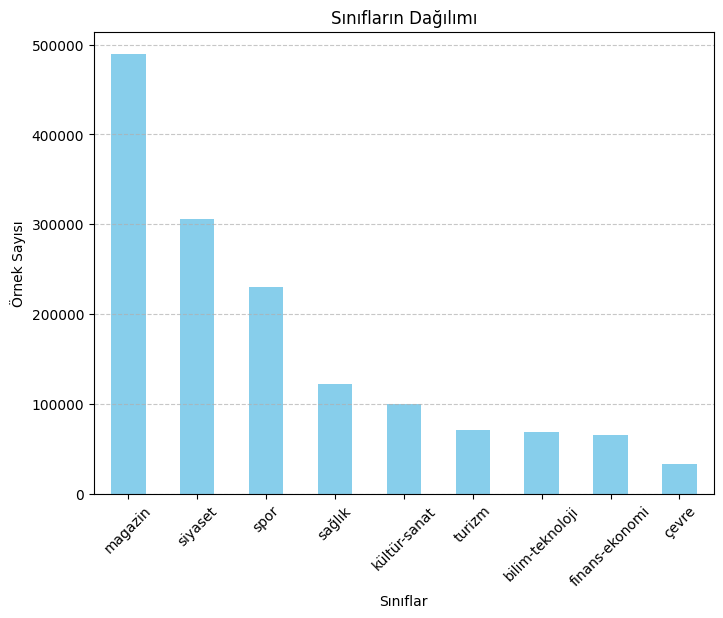

In [ ]:
# Sınıfların sayısını hesapla
class_counts = df['Sınıf'].value_counts()

# Bar grafiği çiz
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Sınıfların Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

([<matplotlib.patches.Wedge at 0x791ea8785180>,
 [Text(-0.9463044959580321, 0.5608099508118727, 'Magazin'),
  Text(-0.4527585010208924, -1.002501740523833, 'Siyaset'),
  Text(0.7159336601137386, -0.8351281304782794, 'Spor'),
  Text(1.092496961151568, -0.12825907326419206, 'Sağlık'),
  Text(1.0323003172374077, 0.37994217327318086, 'Kültür-Sanat'),
  Text(0.8308869737440848, 0.7208514665743538, 'Turizm'),
  Text(0.5856097780508197, 0.9311612040088815, 'Bilim-Teknoloji'),
  Text(0.30272775016028697, 1.0575234793057273, 'Finans'),
  Text(0.07721820364185802, 1.0972863568942817, 'Çevre')],
 [Text(-0.5161660887043811, 0.30589633680647593, '33.0%'),
  Text(-0.24695918237503217, -0.546819131194818, '20.6%'),
  Text(0.39050926915294826, -0.45552443480633414, '15.5%'),
  Text(0.5959074333554008, -0.06995949450774112, '8.2%'),
  Text(0.5630729003113132, 0.207241185421735, '6.7%'),
  Text(0.45321107658768256, 0.3931917090405566, '4.8%'),
  Text(0.31942351530044705, 0.5079061112775717, '4.6%'),
  T

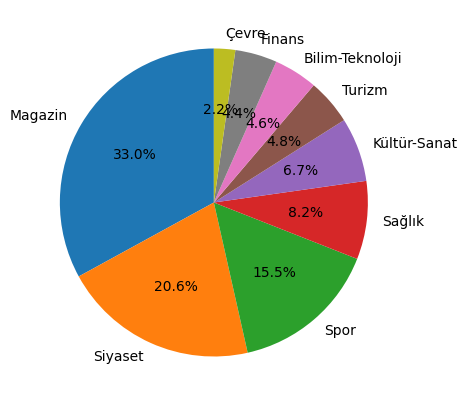

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

magazin = len(df[df['Sınıf'] == 'magazin'])
siyaset = len(df[df['Sınıf'] == 'siyaset'])
spor = len(df[df['Sınıf'] == 'spor'])
bilim = len(df[df['Sınıf'] == 'bilim-teknoloji'])
cevre = len(df[df['Sınıf'] == 'çevre'])
saglik = len(df[df['Sınıf'] == 'sağlık'])
kultur = len(df[df['Sınıf'] == 'kültür-sanat'])
turizm = len(df[df['Sınıf'] == 'turizm'])
finans = len(df[df['Sınıf'] == 'finans-ekonomi'])

pie_y = [magazin, siyaset, spor, saglik, kultur, turizm, bilim, finans, cevre]
pie_labels = ["Magazin", "Siyaset", "Spor", "Sağlık", "Kültür-Sanat", "Turizm", "Bilim-Teknoloji", "Finans", "Çevre"]

plt.pie(pie_y, labels=pie_labels, startangle=90, autopct='%1.1f%%')

In [5]:
print(df.isnull().sum())
df.dropna(subset=['lemmatized_text'], inplace=True)
print(df.isnull().sum())


Sınıf                0
lemmatized_text    126
dtype: int64
Sınıf              0
lemmatized_text    0
dtype: int64


In [ ]:
from collections import Counter

# Tüm metinlerdeki kelimelerin frekanslarını hesapla
tum_metinler = df['lemmatized_text'].str.cat(sep=' ')
kelime_sayilari = Counter(tum_metinler.split())

# En sık geçen 10 kelimeyi bul
en_sik_50_kelimeler = kelime_sayilari.most_common(50)

# Sonuçları göster
print("Tüm metinlerde en sık geçen 50 kelime:")
for kelime, sayi in en_sik_50_kelimeler:
    print(f"{kelime}: {sayi} kez")


Tüm metinlerde en sık geçen 50 kelime:
UNK: 9215839 kez
ol: 6458358 kez
et: 3316509 kez
yap: 2623896 kez
ver: 1406626 kez
al: 1372402 kez
yıl: 1369896 kez
gel: 1230177 kez
de: 1188898 kez
çalış: 898774 kez
oyun: 898351 kez
gün: 885163 kez
ara: 868567 kez
son: 861929 kez
türkiye: 858663 kez
ben: 822217 kez
çık: 816917 kez
var: 802605 kez
bu: 796502 kez
bulun: 758027 kez
yer: 747717 kez
başkan: 743757 kez
gör: 720511 kez
kendi: 718452 kez
kullan: 715087 kez
yaşa: 706271 kez
yüz: 697712 kez
söyle: 695448 kez
ilk: 685833 kez
başla: 679263 kez
iste: 672396 kez
yeni: 669089 kez
iş: 659420 kez
önce: 636234 kez
maç: 622453 kez
konuş: 613885 kez
iyi: 602011 kez
konu: 600833 kez
büyük: 581357 kez
zaman: 566206 kez
alan: 552592 kez
iç: 551114 kez
gerek: 549309 kez
hak: 541557 kez
açıkla: 541410 kez
haber: 540372 kez
dünya: 540115 kez
takım: 535366 kez
göre: 534527 kez
devam: 530551 kez


In [6]:
from collections import Counter

# Tüm metinlerdeki kelimelerin frekanslarını hesapla
tum_metinler = df['lemmatized_text'].str.cat(sep=' ')
kelime_sayilari = Counter(tum_metinler.split())

# Toplam token sayısını ve sık ve nadir tokenlerin sınır sayılarını belirle
toplam_token_sayisi = len(kelime_sayilari)
en_sik_sayi = int(toplam_token_sayisi * 0.10)  # En sık %10'u
en_az_sayi = int(toplam_token_sayisi * 0.10)  # En az %10'u

# En sık ve en az geçen tokenleri belirle
en_sik_tokenler = set([kelime for kelime, sayi in kelime_sayilari.most_common(en_sik_sayi)])
en_az_tokenler = set([kelime for kelime, sayi in kelime_sayilari.most_common()[:-en_az_sayi-1:-1]])



In [ ]:
print(en_sik_tokenler)

{'özdeş', 'yök', 'hafta', 'kapadokya', 'arkeolojik', 'mi', 'sıkıntı', 'mekan', 'bol', 'canan', 'km', 'luis', 'örgüt', 'mülk', 'doku', 'mor', 'ergin', 'nezaket', 'efes', 'etik', 'işletme', 'ford', 'takdir', 'süre', 'pratik', 'molekül', 'pıhtı', 'dilekçe', 'saniye', 'mercedes', 'seans', 'kaşıntı', 'çile', 'milat', 'engin', 'uğurla', 'oğulcan', 'tribün', 'yemek', 'eşit', 'kopya', 'dizi', 'hpv', 'antonio', 'taksi', 'diren', 'roman', 'televizyon', 'isim', 'istek', 'zerrin', 'ligi', 'periyot', 'branş', 'android', 'eyüp', 'trakya', 'havuz', 'leyla', 'rahmi', 'yapılandır', 'neslihan', 'yörünge', 'haciz', 'geleni', 'kanat', 'tekerlek', 'tuncel', 'basın', 'birbiri', 'tüf', 'sermaye', 'çıkar', 'maalesef', 'temas', 'tezgah', 'savun', 'seviş', 'itiraz', 'müracaat', 'kaba', 'konservatuvar', 'kaan', 'bono', 'varis', 'paket', 'genel', 'tamamla', 'saç', 'sil', 'sığın', 'çıkart', 'nur', 'sofra', 'maden', 'geçici', 'cumhurbaşkanı', 'efendi', 'aile', 'tehlike', 'akşener', 'kabus', 'önder', 'ferit', 'ölçüm

In [ ]:
print(en_az_tokenler)

{'mezid', 'beğenir', 'tecik', 'ceyo', 'metbu', 'savlet', 'keçimemesi', 'maroussi', 'esrarkeş', 'raşitik', 'ubak', 'baloz', 'ratib', 'broadwell', 'kuvay', 'bartolomeos', 'duyudışı', 'santrifüjle', 'lemkin', 'orakla', 'pmum', 'andreevo', 'pırpırı', 'eşay', 'akdut', 'bıngılda', 'marut', 'şamandırala', 'kıymettar', 'istifaname', 'söylen', 'rabiatül', 'kurumahmutoğlu', 'kils', 'turnagözü', 'duygun', 'zafira', 'reservasyon', 'gudjohnsen', 'farmakodinami', 'saraoğlu', 'öylesi', 'usdışı', 'petn', 'alpergun', 'bebetto', 'yaresi', 'önsoruşturma', 'yetişim', 'bozahane', 'solukla', 'pekay', 'babakan', 'pranab', 'diaoyü', 'muttasıl', 'küçükayı', 'topkule', 'muhassala', 'nöroleptik', 'tehoue', 'işbırak', 'yumuş', 'iskarpela', 'sözdizim', 'leitner', 'stpetersburg', 'tadashi', 'sedefadası', 'lubos', 'harizm', 'üngün', 'tavşankanı', 'müstağni', 'büyükse', 'dicky', 'enöte', 'alacalan', 'truvakar', 'kurbağacık', 'mimolett', 'bedavasına', 'geçinim', 'yelloz', 'mühimse', 'istimdat', 'müemmen', 'tacil', 'no

In [7]:
# Veri setinde en sık ve en az geçen tokenleri temizle
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: ' '.join([kelime for kelime in x.split() if kelime not in en_sik_tokenler and kelime not in en_az_tokenler]))

# Temizlenmiş veri setini göster
print(df.head())

     Sınıf                                    lemmatized_text
0  magazin     popülarite hoşgörü küçücük ta popülarite surat
1  magazin                              tarabya tarabya dekor
2  siyaset         abluka tayyiperdoğan beşar esad beşar esad
3  siyaset  sızla te halka mühim müessir vasıf siyasetname...
4  magazin        gençoğlu gençoğlu dipçik şinasi yüzbaşıoğlu


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Metin verilerini dönüştürme ve tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['lemmatized_text'])
X = tokenizer.texts_to_sequences(df['lemmatized_text'])


In [9]:
# Padding
max_len = max([len(seq) for seq in X])
X_pad = pad_sequences(X, maxlen=max_len, padding='post')


In [10]:
print(tokenizer.word_index)

{'bergen': 1, 'johnson': 2, 'kuşat': 3, 'erener': 4, 'özbey': 5, 'ilayda': 6, 'eyüboğlu': 7, 'meğer': 8, 'tutuk': 9, 'america': 10, 'toki': 11, 'cinsi': 12, 'çevirme': 13, 'tomografi': 14, 'lokma': 15, 'aksat': 16, 'erman': 17, 'yalın': 18, 'salt': 19, 'carte': 20, 'bölücü': 21, 'kıkırdak': 22, 'baharat': 23, 'sarıoğlu': 24, 'fay': 25, 'lucescu': 26, 'sürül': 27, 'reha': 28, 'şantaj': 29, 'ceyla': 30, 'ehliyet': 31, 'cedi': 32, 'fener': 33, 'erdinç': 34, 'muammer': 35, 'sözleş': 36, 'aptal': 37, 'dinçöz': 38, 'haka': 39, 'toksin': 40, 'ayşen': 41, 'alpaslan': 42, 'ertaş': 43, 'beğendi': 44, 'danilo': 45, 'josef': 46, 'sony': 47, 'henry': 48, 'enteresan': 49, 'birkan': 50, 'turabi': 51, 'rodriguez': 52, 'ergüçlü': 53, 'metraj': 54, 'futbolsever': 55, 'taşeron': 56, 'maire': 57, 'karabağ': 58, 'yerlitaş': 59, 'gecelik': 60, 'pedro': 61, 'ameliyathane': 62, 'haldun': 63, 'kocaelispor': 64, 'sömürü': 65, 'inegöl': 66, 'alıntı': 67, 'brent': 68, 'tuzla': 69, 'aral': 70, 'begüm': 71, 'marina

In [12]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Model mimarisi oluşturma
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='softmax')) # 9 sınıflı bir model olduğunu varsayalım
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])


In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Etiketleri encode etme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Sınıf'])
y_encoded = to_categorical(y_encoded)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.4, random_state=42)


In [15]:
history = model.fit(X_train, y_train, epochs=8, batch_size=2048, validation_data=(X_test, y_test),  callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/8
436/436 [==============================] - 1250s 3s/step - loss: 0.6844 - accuracy: 0.7797 - precision: 0.8608 - recall: 0.6978 - val_loss: 0.7199 - val_accuracy: 0.7690 - val_precision: 0.8536 - val_recall: 0.6834
Epoch 2/8
436/436 [==============================] - 1252s 3s/step - loss: 0.6093 - accuracy: 0.8021 - precision: 0.8735 - recall: 0.7299 - val_loss: 0.7194 - val_accuracy: 0.7712 - val_precision: 0.8160 - val_recall: 0.7299
Epoch 3/8
436/436 [==============================] - 1265s 3s/step - loss: 0.5436 - accuracy: 0.8235 - precision: 0.8880 - recall: 0.7585 - val_loss: 0.7376 - val_accuracy: 0.7695 - val_precision: 0.8397 - val_recall: 0.6987
Epoch 4/8
436/436 [==============================] - 1260s 3s/step - loss: 0.4751 - accuracy: 0.8459 - precision: 0.9058 - recall: 0.7879 - val_loss: 0.7825 - val_accuracy: 0.7656 - val_precision: 0.8277 - val_recall: 0.7022
Epoch 5/8
436/436 [==============================] - 1255s 3s/step - loss: 0.4103 - accuracy: 0.8673

In [16]:
# Modeli kaydet
model.save('/content/drive/MyDrive/NLP/model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Modelin tahminlerini yapma
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerçek sınıf etiketlerini bulma
y_true = np.argmax(y_test, axis=1)

# Karmaşıklık matrisini oluşturma
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Karmaşıklık matrisini yazdırma
print("Confusion Matrix:")
print(conf_matrix)

18574/18574 [==============================] - 158s 9ms/step
Confusion Matrix:
[[ 18017    898   1484   1911   1237   1934    660    699    605]
 [   686  16130    298   3109    309   3776    352    867    409]
 [  1118    269  24315   8253    701   3346    677    924    300]
 [  1158    733   7123 170723   2342   7436   4390   1786    492]
 [   958    400    811   3753  38673   2576    731    610    339]
 [  1382   3933   3382  16954   1847  89045   2239   2148   1241]
 [   422    482    668  12116    712   2892  73739    834    155]
 [   611   1045   1270   5493    712   3137    850  14939    483]
 [   663   1019    501   1918    434   2390    275    775   5330]]


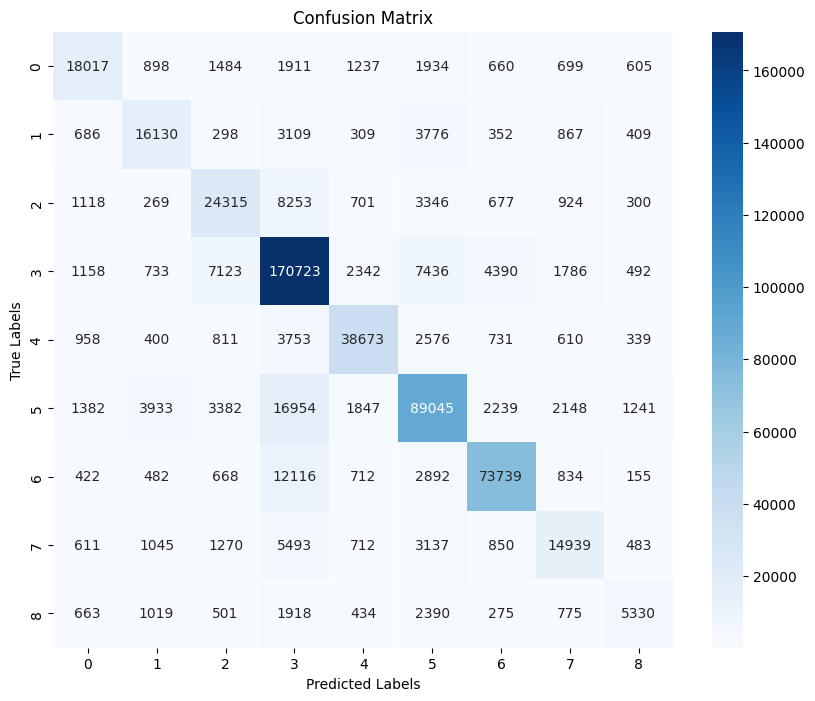

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Isı haritasını çizme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


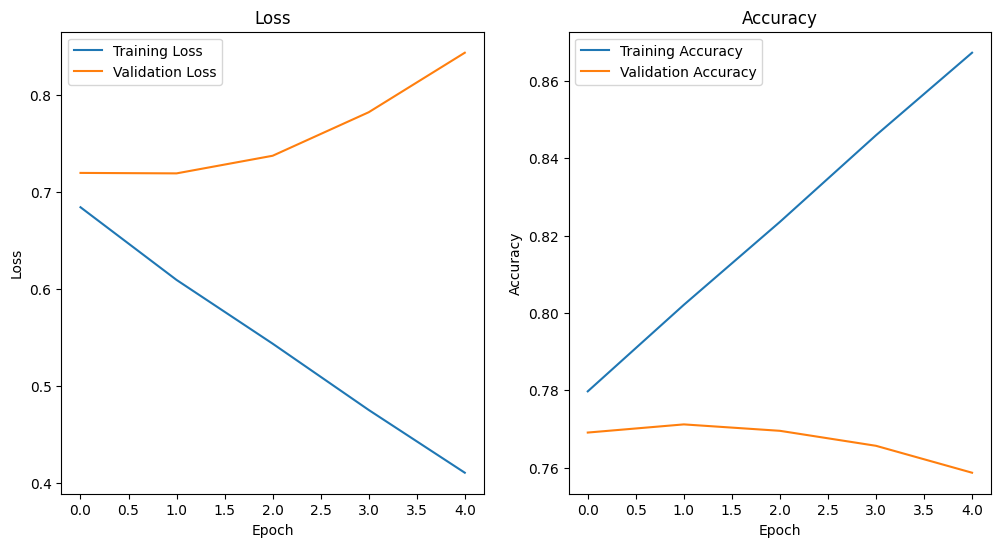

In [20]:
import matplotlib.pyplot as plt

# Modelin eğitim süresi boyunca loss ve accuracy değerlerini alma
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss değerlerini çizme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy değerlerini çizme
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
